In [ ]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

from matplotlib import pyplot
import pandas as pd

In [1]:
# Reading the data
df = pd.read_csv("summer_athlete_medals_count.csv")
print(df.shape)
print(df.info())
df.head()


NameError: name 'pd' is not defined

In [ ]:
# usa_df =  df[(df.Country == "USA") & (df.Year >= 1896)]
# usa_df_gold = usa_df[["Year", "Gold"]]
# usa_df_gold.dropna(inplace=True)
# df1 = pd.DataFrame([[2020, 0]], columns=list(["Year", "Gold"]))
# usa_df_gold = usa_df_gold.append(df1, ignore_index=True)
# usa_df_gold.to_csv('usa_gold_data.csv', index=False)

# usa_df_silver = usa_df[["Year", "Silver"]]
# usa_df_silver.dropna(inplace=True)
# df2 = pd.DataFrame([[2020, 0]], columns=list(["Year", "Silver"]))
# usa_df_silver = usa_df_silver.append(df2, ignore_index=True)
# usa_df_silver.to_csv('usa_silver_data.csv', index=False)

# usa_df_bronze = usa_df[["Year", "Bronze"]]
# usa_df_bronze.dropna(inplace=True)
# df3 = pd.DataFrame([[2020, 0]], columns=list(["Year", "Bronze"]))
# usa_df_bronze = usa_df_bronze.append(df3, ignore_index=True)
# usa_df_bronze
# usa_df_bronze.to_csv('usa_bronze_data.csv', index=False)

# usa_df_total = usa_df[["Year", "Medals"]]
# usa_df_total.dropna(inplace=True)
# df5 = pd.DataFrame([[2020, 0]], columns=list(["Year", "Medals"]))
# usa_df_total = usa_df_total.append(df5, ignore_index=True)
# usa_df_total
# usa_df_total.to_csv('usa_total_data.csv', index=False)

# Create explicit copies when slicing to avoid SettingWithCopyWarning
usa_df = df[(df.Country == "USA") & (df.Year >= 1896)]

# Process Gold medal data
usa_df_gold = usa_df[["Year", "Gold"]].copy()  # Create explicit copy
usa_df_gold.dropna(inplace=True)
df1 = pd.DataFrame([[2020, 0]], columns=["Year", "Gold"])
# Use pd.concat instead of append (which is deprecated)
usa_df_gold = pd.concat([usa_df_gold, df1], ignore_index=True)
usa_df_gold.to_csv('usa_gold_data.csv', index=False)

# Process Silver medal data
usa_df_silver = usa_df[["Year", "Silver"]].copy()  # Create explicit copy
usa_df_silver.dropna(inplace=True)
df2 = pd.DataFrame([[2020, 0]], columns=["Year", "Silver"])
usa_df_silver = pd.concat([usa_df_silver, df2], ignore_index=True)
usa_df_silver.to_csv('usa_silver_data.csv', index=False)

# Process Bronze medal data
usa_df_bronze = usa_df[["Year", "Bronze"]].copy()  # Create explicit copy
usa_df_bronze.dropna(inplace=True)
df3 = pd.DataFrame([[2020, 0]], columns=["Year", "Bronze"])
usa_df_bronze = pd.concat([usa_df_bronze, df3], ignore_index=True)
usa_df_bronze.to_csv('usa_bronze_data.csv', index=False)

# Process Total medals data
usa_df_total = usa_df[["Year", "Medals"]].copy()  # Create explicit copy
usa_df_total.dropna(inplace=True)
df5 = pd.DataFrame([[2020, 0]], columns=["Year", "Medals"])
usa_df_total = pd.concat([usa_df_total, df5], ignore_index=True)
usa_df_total.to_csv('usa_total_data.csv', index=False)


Year=2004, predicted=104, actual=101


C:\Users\KIIT\AppData\Local\Temp\ipykernel_27424\1443365278.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('usa_total_data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_27424\1443365278.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Year=%i, predicted=%i, actual=%i' % (df4['Year'][size],yhat, obs))


Year=2008, predicted=101, actual=110
Year=2012, predicted=105, actual=103
Year=2016, predicted=106, actual=121
4
Test MSE: 33.138


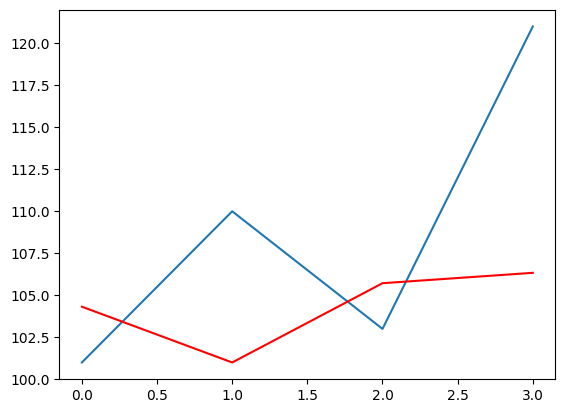

In [ ]:
from sklearn.metrics import mean_squared_error
def parser(x):
    #return datetime.strptime('190'+x, '%Y-%m')* add squeeze in line series block squeeze  True aftr index_col
    return datetime.strptime(x, '%Y')

series = read_csv('usa_total_data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
df4 = pd.read_csv("usa_total_data.csv")
error = []
X = series.values
#print(df4['Year'][0])
size = int(len(X) * 0.85)
train, test = X[0:size-1], X[size:len(X)-1]
history = [x for x in train]
predictions = list()
#print(test)
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    #print(model)
    model_fit = model.fit() #disp = 0  pass arguement
    #print(model_fit)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Year=%i, predicted=%i, actual=%i' % (df4['Year'][size],yhat, obs))
    size +=1
print(len(test))
test_value = test[:-1]
predictions_value = predictions[:-1]
error = mean_squared_error(test_value, predictions_value)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()